## importing libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from statsmodels.stats.outliers_influence import variance_inflation_factor

## reading the original data 

In [38]:
df_ori = pd.read_excel("ENB2012_data.xlsx")
Y1 = df_ori.iloc[:,8].values  # Y1 is heating load
Y2 = df_ori.iloc[:,9].values  # Y2 is cooling load
X = df_ori.iloc[:,[1, 2, 3, 4, 5, 6, 7]].values

## Correlation matrix for original data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


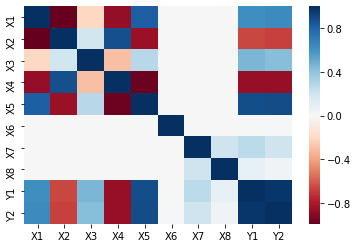

In [39]:
corrmat = df_ori.corr()
# to find the correlation matrix for features only
display(corrmat)

# also we can find the heatmap to get better visual idea
sns.heatmap(corrmat, xticklabels = corrmat.columns, yticklabels = corrmat.columns, cmap = 'RdBu')

## Reading imputed data

In [40]:
df = pd.read_csv('final_imputed.csv')
Y1 = df.iloc[:,8].values  # Y1 is heating load
Y2 = df.iloc[:,9].values  # Y2 is cooling load
X = df.iloc[:,[0,1,2,3, 4, 5, 6, 7]].values

## VIF for imputed data

In [41]:
# Finding the VIF for all the features
VX = sm.tools.add_constant(df)
#create series for both
series = pd.Series([variance_inflation_factor(VX.values, i) for i in range(VX.shape[1])],index = VX.columns)
print('VIF DATA')
print('-'*100)
display(series)

VIF DATA
----------------------------------------------------------------------------------------------------


C:\Users\Admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    31678.696187
X1         108.284836
X2        1334.089813
X3         304.978293
X4        1335.328284
X5          31.836044
X6           1.027926
X7           1.887379
X8           1.078357
Y1          32.618265
Y2          24.361169
dtype: float64

In [42]:
#CONCLUSIONS#
#From the above data of VIF we can say some of the features are highly correlated.
#By removing those features we can make a good model.

## Splitting in training and testing sets for heating load

In [43]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X, Y1, test_size=0.2, random_state = 0 )

## Splitting in training and testing sets for Cooling load

In [44]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X, Y2, test_size=0.2, random_state = 0)

In [45]:
#sns.pairplot(df)

## normalizing and appyling PCA so that data reduces to 2D and easily visualize, and can conclude the machine learning techniques that can be used  for used data

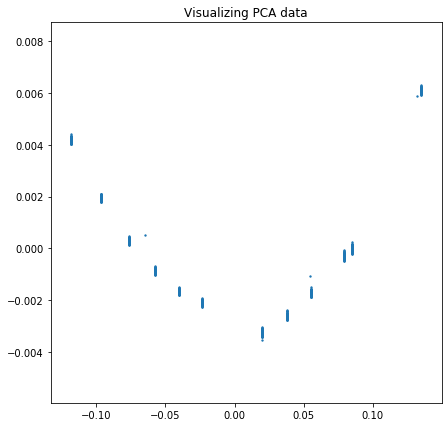

In [46]:
pca = PCA(n_components=2)
normalizer = Normalizer(copy=False)
X_norm = normalizer.fit_transform(X)
X_reduced = pca.fit_transform(X_norm)

plt.figure(figsize = (7 , 7))
plt.scatter(X_reduced[:,0],X_reduced[:,1], s = 1.8)
plt.title('Visualizing PCA data')
plt.show()

Here we can see that whole data is very separate and divided approximately in 12 clusters

## To fit the appropriate model and to select model we need to reduce dimensions of the training data and testing set for features

###### i.e. one dimension from training set and testing sets individually

##### for heating load

In [47]:
# for X1_train
pca = PCA(n_components=1)
normalizer = Normalizer(copy=False)
X1_train_norm = normalizer.fit_transform(X1_train)
X1_train_reduced = pca.fit_transform(X1_train_norm)

# for X1_test
X1_test_norm = normalizer.transform(X1_test)
X1_test_reduced = pca.transform(X1_test_norm)

##### for cooling load

In [48]:
# for X2_train
pca = PCA(n_components=1)
normalizer = Normalizer(copy=False)
X2_train_norm = normalizer.fit_transform(X2_train)
X2_train_reduced = pca.fit_transform(X2_train_norm)

# for X2_test
X2_test_norm = normalizer.transform(X2_test)
X2_test_reduced = pca.transform(X2_test_norm)

## Trying fitting Linear regression in reduced training sets

###### for heating load

In [49]:
regr_heat = linear_model.LinearRegression()
regr_heat.fit(X1_train_reduced, y1_train)
Y1_predict = regr_heat.predict(X1_test_reduced)

###### for cooling load

In [50]:
regr_cool = linear_model.LinearRegression()
regr_cool.fit(X2_train_reduced, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###### Plotting both (Red = heating data set and Blue = cooling data set)

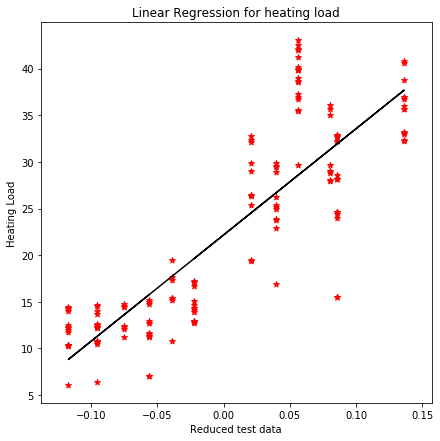

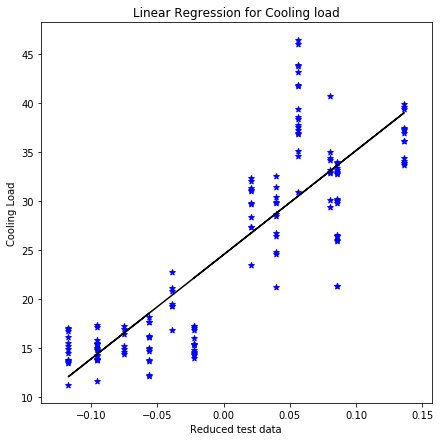

In [51]:
plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Heating Load')
plt.title('Linear Regression for heating load')
plt.scatter(X1_test_reduced, y1_test, color = 'red', marker = '*')
plt.plot(X1_test_reduced, regr_heat.predict(X1_test_reduced), color = 'black')
plt.show()

plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Cooling Load')
plt.title('Linear Regression for Cooling load')
plt.scatter(X2_test_reduced, y2_test, color = 'blue', marker = '*')
plt.plot(X2_test_reduced, regr_cool.predict(X2_test_reduced), color = 'black')
plt.show()

In [52]:
regr_heat = sm.OLS(y1_train, X1_train_reduced)
model_heat = regr_heat.fit()
print("Model summary for Heating Load")
print(model_heat.summary())
print(" "* 100)
print("*"* 100)
print("*"* 100)
print("*"* 100)
print(" "* 100)
regr_cool = sm.OLS(y2_train, X2_train_reduced)
model_cool = regr_cool.fit()
print("Model summary for cooling Load")
print(model_cool.summary())

Model summary for Heating Load
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.128
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                              89.65
Date:                Sun, 27 Oct 2019   Prob (F-statistic):                    6.04e-20
Time:                        21:18:27   Log-Likelihood:                         -2788.7
No. Observations:                 614   AIC:                                      5579.
Df Residuals:                     613   BIC:                                      5584.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

#### Since the r squared values are very low for linear regression hence it is not good fit

## Trying fitting KNN regression in reduced training sets

###### for heating data

#### Parameter tuning according to knn score

In [53]:
asc_red1 = []
k_red1 = []
for i in range(30):
    regr_heat_KNN = KNN(n_neighbors = i+1)
    regr_heat_KNN.fit(X1_train_reduced, y1_train)
    asc_red1.append(regr_heat_KNN.score(X1_test_reduced,y1_test))
    k_red1.append(i+1)

Thus maximum accuracy is for k = 27 for heating load when reduced features are taken


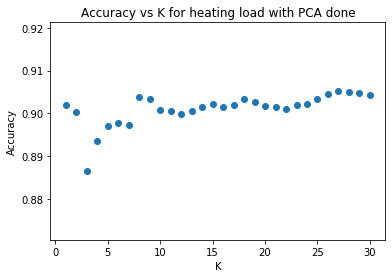

In [54]:
plt.scatter(k_red1, asc_red1)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for heating load with PCA done")
print(f'Thus maximum accuracy is for k = {asc_red1.index(np.max(asc_red1)) + 1} for heating load when reduced features are taken')

#### Parameter tuning according to Cross_val_score

###### for cooling load

#### Parameter tuning according to knn score

In [55]:
asc_red2 = []
k_red2 = []
for i in range(30):
    regr_cool_KNN = KNN(n_neighbors = i+1)
    regr_cool_KNN.fit(X2_train_reduced, y2_train)
    asc_red2.append(regr_cool_KNN.score(X2_test_reduced,y2_test))
    k_red2.append(i+1)

Thus maximum accuracy is for k = 27 for cooling load when reduced features are taken


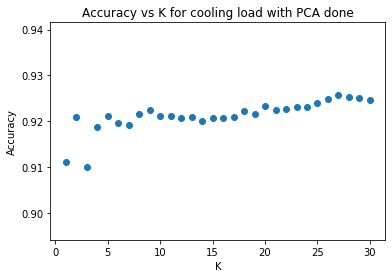

In [56]:
plt.scatter(k_red2, asc_red2)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for cooling load with PCA done")
print(f'Thus maximum accuracy is for k = {asc_red2.index(np.max(asc_red2)) + 1} for cooling load when reduced features are taken')

In [57]:
# fitting KNN with optimum K
regr_heat_KNN = KNN(n_neighbors = 5)
regr_heat_KNN.fit(X1_train_reduced, y1_train)
regr_cool_KNN = KNN(n_neighbors = 5)
regr_cool_KNN.fit(X2_train_reduced, y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

###### Plotting both (Red = heating data set and Blue = cooling data set)

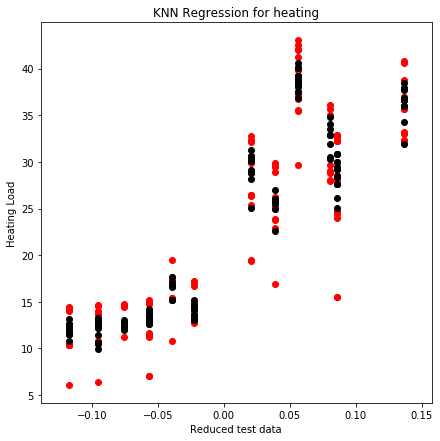

The accuracy for this model is 0.897063171758956


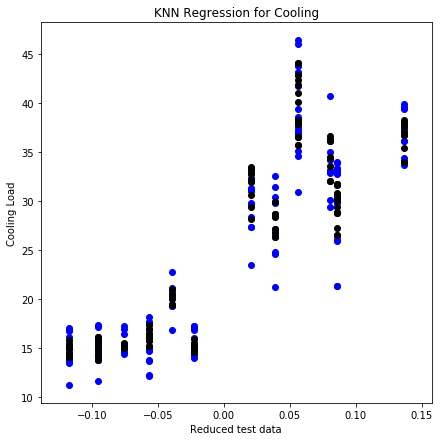

The accuracy for this model is 0.921140080900405


In [64]:
plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Heating Load')
plt.title('KNN Regression for heating')
plt.scatter(X1_test_reduced,y1_test,color = 'red', marker = 'o')
plt.scatter(X1_test_reduced, regr_heat_KNN.predict(X1_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_heat_KNN.score(X1_test_reduced,y1_test)}')

plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Cooling Load')
plt.title('KNN Regression for Cooling')
plt.scatter(X2_test_reduced,y2_test,color = 'blue', marker = 'o')
plt.scatter(X2_test_reduced, regr_cool_KNN.predict(X2_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_cool_KNN.score(X2_test_reduced,y2_test)}')

## Trying fitting Decision Tree regression in reduced training sets

###### for heating data

In [65]:
regr_heat_DTR = DTR()
regr_heat_DTR.fit(X1_train_reduced, y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### for cooling load

In [66]:
regr_cool_DTR = DTR()
regr_cool_DTR.fit(X2_train_reduced, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### Plotting both (Red = heating data set and Blue = cooling data set)

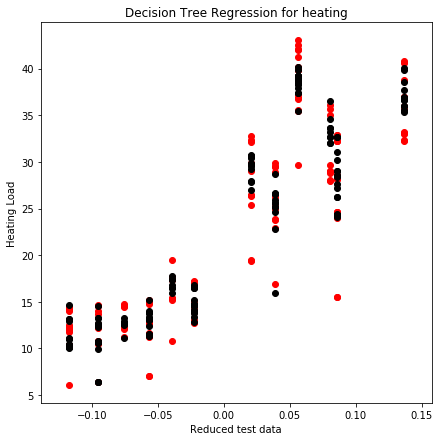

The accuracy for this model is 0.8727598258507117


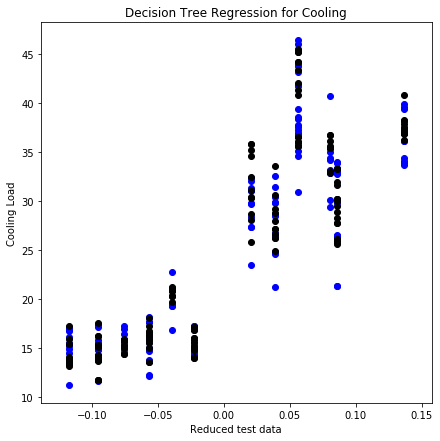

The accuracy for this model is 0.9070892583304828


In [67]:
plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Heating Load')
plt.title('Decision Tree Regression for heating')
plt.scatter(X1_test_reduced,y1_test,color = 'red', marker = 'o')
plt.scatter(X1_test_reduced, regr_heat_DTR.predict(X1_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_heat_DTR.score(X1_test_reduced,y1_test)}')

plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Cooling Load')
plt.title('Decision Tree Regression for Cooling')
plt.scatter(X2_test_reduced,y2_test,color = 'blue', marker = 'o')
plt.scatter(X2_test_reduced, regr_cool_DTR.predict(X2_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_cool_DTR.score(X2_test_reduced,y2_test)}')

## Trying fitting Random forest regression in reduced training sets

###### for heating data

In [68]:
regr_heat_RFR = RFR()
regr_heat_RFR.fit(X1_train_reduced, y1_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### for cooling data

In [69]:
regr_cool_RFR = RFR()
regr_cool_RFR.fit(X2_train_reduced, y2_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### Plotting both (Red = heating data set and Blue = cooling data set)

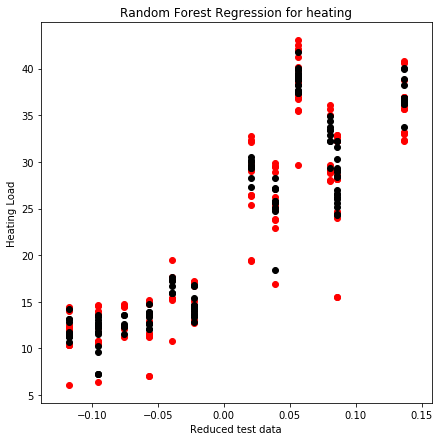

The accuracy for this model is 0.882912063362348


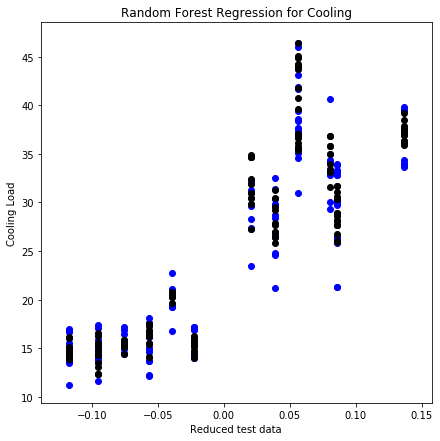

The accuracy for this model is 0.9230560719610192


In [70]:
plt.figure(figsize = (7 , 7))
plt.xlabel('Reduced test data')
plt.ylabel('Heating Load')
plt.title('Random Forest Regression for heating')
plt.scatter(X1_test_reduced,y1_test,color = 'red', marker = 'o')
plt.scatter(X1_test_reduced, regr_heat_RFR.predict(X1_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_heat_RFR.score(X1_test_reduced,y1_test)}')

plt.figure(figsize = (7, 7))
plt.xlabel('Reduced test data')
plt.ylabel('Cooling Load')
plt.title('Random Forest Regression for Cooling')
plt.scatter(X2_test_reduced,y2_test,color = 'blue', marker = 'o')
plt.scatter(X2_test_reduced, regr_cool_RFR.predict(X2_test_reduced), color = 'black')
plt.show()
print(f'The accuracy for this model is {regr_cool_RFR.score(X2_test_reduced,y2_test)}')

### Conclusion: Since all KNN, Decision Tree and Random Forest gave almost same and decent results, so applying this methods for the non reduced data. And rejecting Linear Regression due to very low R squared value

# Fitting Non reduced imputed Data in selected 3 models

# 1) KNN regressor

###### for heating data

In [71]:
from sklearn.model_selection import cross_val_score
scores_knn=[]
k_red1=[]
for i in range(30):
    regr_heat_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_heat_KNN,X, Y1,cv=10)
    scores_knn.append(scores1.mean())
    k_red1.append(i+1)

Thus maximum Cross_val_score = 0.8844671788419356 is for k = 5 for heating load .


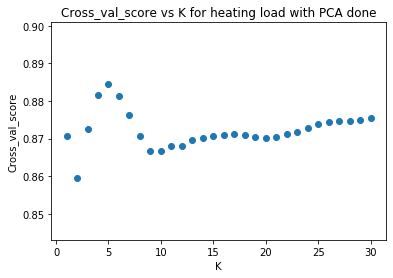

In [72]:
plt.scatter(k_red1,scores_knn )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for heating load with PCA done")
print(f'Thus maximum Cross_val_score = {scores_knn[scores_knn.index(np.max(scores_knn))]} is for k = {scores_knn.index(np.max(scores_knn)) + 1} for heating load .')

###### For cooling data

In [73]:
scores_knn1=[]
k_red2=[]
for i in range(30):
    regr_cool_KNN = KNN(n_neighbors = i+1)
    scores1 = cross_val_score(regr_cool_KNN,X, Y2,cv=10)
    scores_knn1.append(scores1.mean())
    k_red2.append(i+1)

Thus maximum Cross_val_score = 0.9196847096289688 is for k = 5 for cooling load .


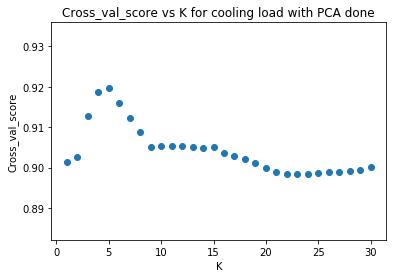

In [74]:
plt.scatter(k_red2,scores_knn1 )
plt.xlabel("K")
plt.ylabel("Cross_val_score")
plt.title("Cross_val_score vs K for cooling load with PCA done")
print(f'Thus maximum Cross_val_score = {scores_knn1[scores_knn1.index(np.max(scores_knn1)) ]} is for k = {scores_knn1.index(np.max(scores_knn1)) + 1} for cooling load .')

In [75]:
# fitting KNN for both with optimum K
Reg_heat_KNN = KNN(n_neighbors =scores_knn.index(np.max(scores_knn)) + 1)
Reg_heat_KNN.fit(X1_train,y1_train)

Reg_cool_KNN = KNN(n_neighbors = scores_knn.index(np.max(scores_knn)) + 1)
Reg_cool_KNN.fit(X2_train,y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

###### Accuracy for both

## KNN score

In [76]:
print(f'Accuracy for heating data model is {Reg_heat_KNN.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_KNN.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9423980407494399
Accuracy for cooling data model is 0.9506609154438678


## RMSE value

In [80]:
import math
from sklearn.metrics import r2_score
Y1_predict = Reg_heat_KNN.predict(X1_test)
Y2_predict = Reg_cool_KNN.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 2.5220566177975914
Cooling RMSE: 2.1542090361495956


## r2_score

In [81]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9423980407494399
Cooling r2_score: 0.9506609154438678


## Cross_val_score

In [82]:
# For heating load
from sklearn.model_selection import cross_val_score
Regr_heat_KNN = KNN(n_neighbors = 4)
scores1 = cross_val_score(Regr_heat_KNN,X1_test, y1_test,cv=10)
print(f'Cross val score of KNN with Heating Load: {scores1.mean()}')

# For cooling load
Regr_cool_KNN = KNN(n_neighbors = 4)
scores2 = cross_val_score(Regr_cool_KNN,X2_test, y2_test,cv=10)
print(f'Cross val score of KNN with Cooling Load: {scores2.mean()}')

Cross val score of KNN with Heating Load: 0.8962776674820899
Cross val score of KNN with Cooling Load: 0.9128533987248169


# 2) Decision Tree Regressor

###### For heating data

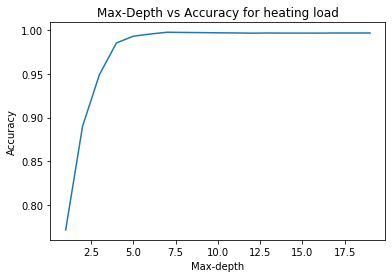

maximum accuracy is 0.9973253928727842 for split with 7


In [83]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep1[index]}")

In [84]:
# since maximum accuracy is with max_depth = 7
Reg_heat_DTR = DTR(max_depth = 7)
Reg_heat_DTR.fit(X1_train,y1_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### For cooling data

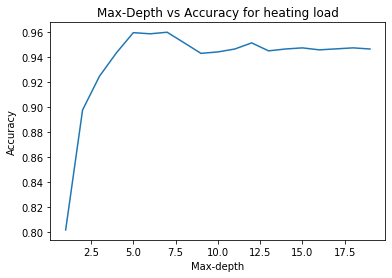

maximum accuracy is 0.9597460297841806 for split with 7


In [85]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = DTR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [86]:
# since maximum accuracy is with max_depth = 7
Reg_cool_DTR = DTR(max_depth = 7)
Reg_cool_DTR.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

###### Accuracy for both

## Decision Tree score

In [87]:
print(f'Accuracy for heating data model is {Reg_heat_DTR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_DTR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9973662675333866
Accuracy for cooling data model is 0.9594423270919162


## RMSE value

In [88]:
Y1_predict = Reg_heat_DTR.predict(X1_test)
Y2_predict = Reg_cool_DTR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 0.539289584603592
Cooling RMSE: 1.9531194899809035


## r2_score

In [89]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9973662675333865
Cooling r2_score: 0.9594423270919162


## Cross_val_score

In [90]:
# For heating load
from sklearn.model_selection import cross_val_score
Regr_heat_DTR = DTR()
scores1 = cross_val_score(Regr_heat_DTR,X1_test, y1_test,cv=10)
print(f'Cross val score of DTR with Heating Load: {scores1.mean()}')

# For cooling load
Regr_cool_DTR = DTR()
scores2 = cross_val_score(Regr_cool_DTR,X2_test, y2_test,cv=10)
print(f'Cross val score of DTR with Cooling Load: {scores2.mean()}')

Cross val score of DTR with Heating Load: 0.9692757887526108
Cross val score of DTR with Cooling Load: 0.9069391942489551


# 3) Random Forest Regressor

###### For heating data

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

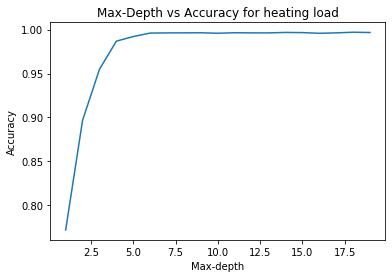

maximum accuracy is 0.996999006163531 for split with 18


In [91]:
#By changing the max_depth
acu11 = []
dep1 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X1_train,y1_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X1_test)
    dep1.append(i)
    acu11.append(r2(y1_test, y11_pred))
plt.plot(dep1,acu11)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu11)
index = acu11.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep1[index]}")

In [92]:
Reg_heat_RFR = RFR(max_depth = 16)
Reg_heat_RFR.fit(X1_train,y1_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### For cooling data

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

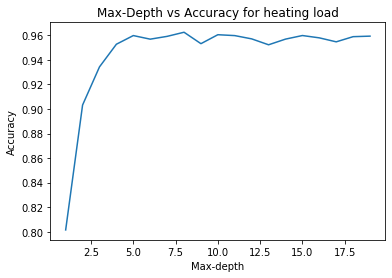

maximum accuracy is 0.9625102259561598 for split with 8


In [93]:
#By changing the max_depth
acu21 = []
dep2 =[]
for i in range(1,20):

    reg_dt11 = RFR(max_depth=i)


    reg_dt11 = reg_dt11.fit(X2_train,y2_train)

    #Predict the response for test dataset
    y11_pred = reg_dt11.predict(X2_test)
    dep2.append(i)
    acu21.append(r2(y2_test, y11_pred))
plt.plot(dep2,acu21)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy for heating load")
plt.show()
max_accu11 = np.max(acu21)
index = acu21.index(max_accu11)
print(f"maximum accuracy is {max_accu11} for split with {dep2[index]}")

In [94]:
Reg_cool_RFR = RFR(max_depth = 5)
Reg_cool_RFR.fit(X2_train,y2_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

###### Accuracy for both

## Random forest score

In [95]:
print(f'Accuracy for heating data model is {Reg_heat_RFR.score(X1_test,y1_test)}')
print(f'Accuracy for cooling data model is {Reg_cool_RFR.score(X2_test,y2_test)}')

Accuracy for heating data model is 0.9965579645089997
Accuracy for cooling data model is 0.95880728364512


## RMSE value

In [96]:
Y1_predict = Reg_heat_RFR.predict(X1_test)
Y2_predict = Reg_cool_RFR.predict(X2_test)
regression_model_mse_heat = mean_squared_error(y1_test,Y1_predict )
regression_model_rmse_heat = math.sqrt(regression_model_mse_heat)
regression_model_mse_cool = mean_squared_error( y2_test,Y2_predict )
regression_model_rmse_cool = math.sqrt(regression_model_mse_cool)
# Printing the RMSE values of test and train
print(f'Heating RMSE: {regression_model_rmse_heat}')
print(f'Cooling RMSE: {regression_model_rmse_cool}')

Heating RMSE: 0.6165153243661255
Cooling RMSE: 1.9683508646706458


## r2_score

In [97]:
heat_r2 = r2_score(y1_test,Y1_predict)
cool_r2 = r2_score(y2_test,Y2_predict)
print(f'Heating r2_score: {heat_r2}')
print(f'Cooling r2_score: {cool_r2}')

Heating r2_score: 0.9965579645089997
Cooling r2_score: 0.95880728364512


## Cross_val_score

In [98]:
# For heating load
from sklearn.model_selection import cross_val_score
Regr_heat_RFR = RFR()
scores1 = cross_val_score(Regr_heat_RFR,X1_test, y1_test,cv=10)
print(f'Cross val score of RFR with Heating Load: {scores1.mean()}')

# For cooling load
Regr_cool_RFR = RFR()
scores2 = cross_val_score(Regr_cool_RFR,X2_test, y2_test,cv=10)
print(f'Cross val score of RFR with Cooling Load: {scores2.mean()}')

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Cross val score of RFR with Heating Load: 0.9796014540464292
Cross val score of RFR with Cooling Load: 0.9357321110028114


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F